In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
data= pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

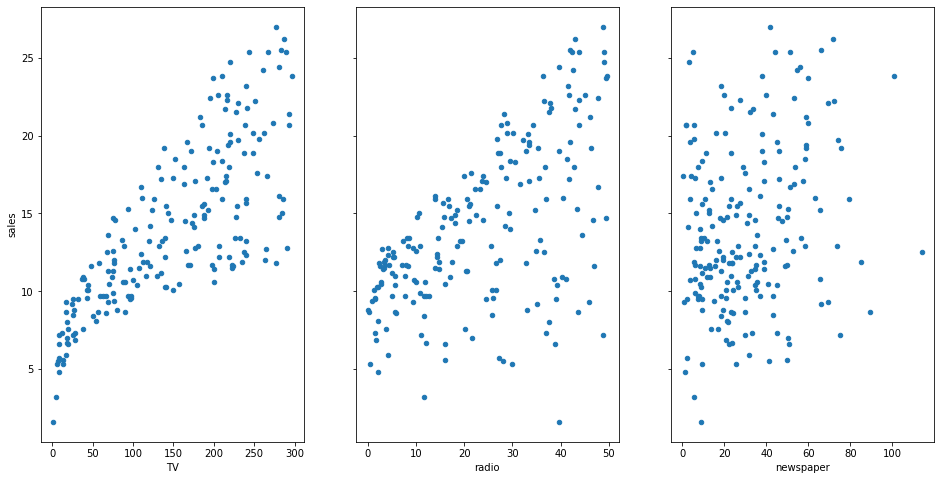

In [7]:
fig, axs=plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])         

In [8]:
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales  

from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False)
lm.fit(X, y)

print(lm.intercept_)
print(lm.coef_)

0.0
[0.08324961]


In [9]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [10]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
type(y)

pandas.core.series.Series

In [12]:
lm.predict([[18779789]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1563410.08603353])

In [13]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [14]:
lm.predict(X_new)

array([4.16248044])

In [15]:
lm

LinearRegression(fit_intercept=False)

In [16]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [17]:
preds = lm.predict(X_new)
preds

array([ 0.05827473, 24.67518402])

<AxesSubplot:xlabel='TV', ylabel='sales'>

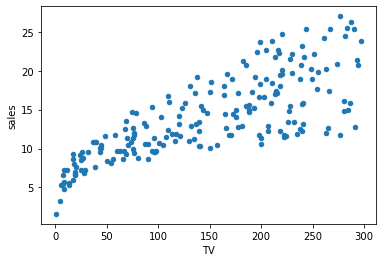

In [18]:
# ploting observed data 
data.plot(kind='scatter', x='TV', y='sales')



In [19]:
feature_cols = ['TV', 'radio', 'newspaper']

In [20]:
feature_cols

['TV', 'radio', 'newspaper']

In [21]:
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)

print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [22]:
import statsmodels.formula.api as smf

In [23]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

In [24]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        14:47:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
new_data=pd.DataFrame({'TV':[5436],'radio':[10000],'newspaper':[3]})
prediction=lm.predict(new_data)
print('sales prediction:',prediction[0])

sales prediction: 2137.0125587679177


In [27]:
new_data=pd.DataFrame({'TV':[50000],'radio':[1000],'newspaper':[5]})
prediction=lm.predict(new_data)
print('sales prediction:',prediction[0])

sales prediction: 2479.695991592331
